# Model Performance and Characteristics

We will explore the model performance the per-cell and per-sample prediction level. Additionally, we will look at representative cells of APL vs AML.

In [1]:
#Load Imports and Model
import sys
sys.path.append('../')
from DeepAPL.DeepAPL import DeepAPL_SC
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
gpu = 1
classes = ['AML','APL']
#Select for only Immature cells
cell_types = ['Blast, no lineage spec','Myelocyte','Promyelocyte','Metamyelocyte','Promonocyte']
device = '/device:GPU:'+ str(gpu)
DAPL = DeepAPL_SC('Blast_S_'+str(gpu),device=device)
DAPL.Import_Data(directory='../Data/All', Load_Prev_Data=True, classes=classes,
                 include_cell_types=cell_types)
with open('Cell_Preds.pkl','rb') as f:
    DAPL.Cell_Pred = pickle.load(f)
with open('Cell_Masks.pkl','rb') as f:
    DAPL.w = pickle.load(f)

## Per-Cell Prediction Performance

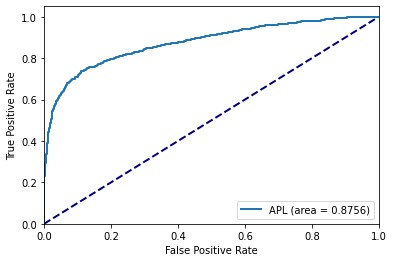

In [2]:
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
y_test = np.asarray(DAPL.Cell_Pred['Label']) == 'APL'
y_pred = np.asarray(DAPL.Cell_Pred['APL'])
roc_score = roc_auc_score(y_test,y_pred)
fpr, tpr, th = roc_curve(y_test, y_pred)
id = 'APL'
plt.plot(fpr, tpr, lw=2, label='%s (area = %0.4f)' % (id, roc_score))
plt.legend(loc="lower right")


## Cell Predictions by Cell Type

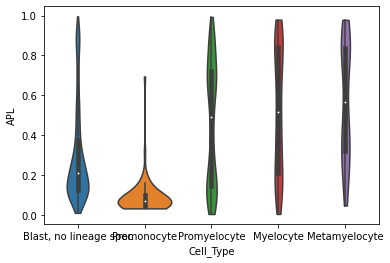

In [3]:
import seaborn as sns
order = ['Blast, no lineage spec', 'Promonocyte', 'Promyelocyte', 'Myelocyte', 'Metamyelocyte', ]
sns.violinplot(data=DAPL.Cell_Pred,x='Cell_Type',y='APL',order=order,cut=0)

## Cell Predictions by Cell Type (stratified by AML/APL)

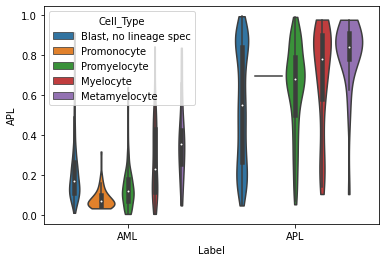

In [4]:
sns.violinplot(data=DAPL.Cell_Pred,x='Label',y='APL',hue='Cell_Type',hue_order=order,cut=0)

## Sample Level Predictions

Per-Cell predictions will be averaged over a sample to get a per-sample probability of being APL/AML. This will then be used to characterize the sample-level prediction performane.

In [ ]:
DAPL.Sample_Summary(Load_Prev_Data=True)